출처: 원본 소스 책

# 1장. 머신러닝의 주요개념과 그 유형
- 머신러닝의 일반적인 개념
- 학습의 세 가지 유형과 기초 용어
- 머신러닝 시스템을 성공적으로 설계하기 위한 요소의 구성 과정
- 데이터 분석과 머신러닝을 위한 파이썬

## 머신러닝의 일반적인 개념
인간이 많은 양의 데이터를 분석할때 수동으로 규칙을 만들고 모델을 생성하는 대신, 머신러닝은 데이터로 부터 다시 지식을 얻을 수 있는 자기학습 알고리즘이다.

## 머신러닝의 세 가지 유형
- 지도학습(Supervised learning)
- 비지도학습(Unsupervised learning)
- 강화학습(Reinforcement learing)

## 머신러닝의 작업흐름

1. 전처리: 가공되지 않은 데이터가 머신러닝에 필요한 형식으로 존재하는 경우는 매우 드물다.
2. 학습
3. 평가
4. 예측

## 데이터 분석과 머신러닝을 위한 파이썬
파이썬은 데이터 과학에서 가장 인기 있는 프로그래밍 언어입니다. 여기에서는 오픈소스 머신러닝 라이브러리 중 하나인 `scikit learn`에 대해 주로 다루겠습니다.

### 파이썬 패키지 설치
과학적 계산을 위한 배포판인 `Anaconda`를 적극 추천합니다. `Anaconda`는 무료이면서 데이터 과학에 모든 필수 요소들을 모아놓았습니다.
설치는 다음 링크를 확인하세요.

```bash
conda install [package_name]
```


# 2장. 퍼셉트론

파이썬에서 단계별로 퍼셉트론(perceptron)을 구축해보고 **iris** 데이터의 꽃 종류를 분류 해보겠습니다.
퍼셉트론은 무엇인가?

## 파이썬에서 퍼셉트론 구현하기


In [58]:
import numpy as np
class Perceptron(object):
    """ eta: learning rate
        n_iter : passes over the training dataset
        w_ : weights after fitting
        errors_ : number of misclassifications in every epoch
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, x, y):
        """ x: traning vectors, where n_samples is the number of samples and n_features in the number of n_features
            y: target values return
        """
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []
        for i in range(self.n_iter):
            errors = 0
            for j,k in zip(x,y):
                update = self.eta * (k - self.predict(j))
                self.w_[1:] += update * j
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        """ calculate net input """
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        """return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, -1)

## iris 데이터에 퍼셉트론 모델 훈련하기
퍼셉트론 구현을 테스트 하기 위해 **iris**데이터를 사용하겠습니다. 전체 데이터에서 두개의 종인 Setosa와 Versicolor만 불러오겠습니다.

우선은 `pandas` 라이브러리를 사용해 데이터를 `dataframe`으로 불러오고 `tail()` 기능을 사용해 데이터가 올바른지 확인할게요.

In [59]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


이제 앞에서부터 50개의 Setosa와 Versicolor 데이터만 추출해서 각각을 1, -1로 레이블하겠습니다. 이것은 `numpy` 표현 방식에 맞도록 벡터 y에 할 당하는 것입니다. 이 100개의 데이터에서 sepal length와 petal length를 추출해서 행렬 x에 할당합니다. 이것을 시각화 하면 다음과 같습니다.

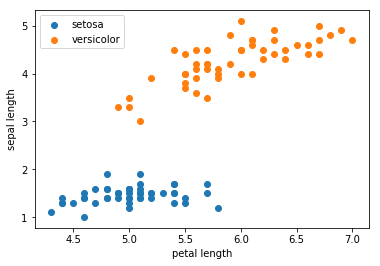

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

y = df.iloc[0:100, 4].values
y = np.where( y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], label = 'setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()


이제 퍼셉트론 알고리즘을 훈련시킬 차례입니다. 또한 알고리즘의 에포크에 대한 오분류 오차 플롯을 확인해야 합니다.

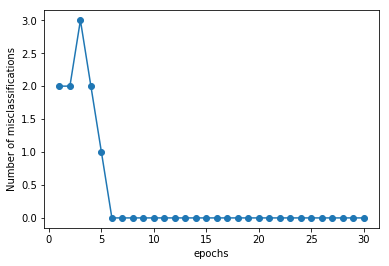

In [61]:
ppn = Perceptron(eta = 0.1, n_iter = 30)
ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('Number of misclassifications')
plt.show()

그림에서 볼 수 있듯이 5번째 에포크 이후 수렴되었고, 이제 훈련 샘플을 환벽하게 분류할 수 있을 것입니다. 이제 시각화를 위한 함수를 구현해보겠습니다.

In [62]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.5, cmap = cmap)
    #plot class sample
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y = x[y == cl, 1], alpha = 0.7, c = cmap(idx), marker = markers[idx], label = cl)
        
    

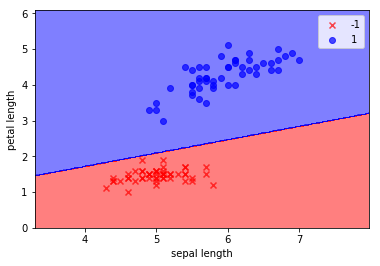

In [63]:
plot_decision_regions(x, y, classifier = ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show()

그림에서 볼 수 있듯이 퍼셉트론은 데이터 부분 집합의 모든 샘플을 완벽하게 분류할 수 있습니다. 

## 결론

이번 장에는 선형 분류의 기초 개념인 퍼셉트론을 직접 구현해 보았습니다. 이제는 산업과 학계에서 일반적으로 사용하고 있는 더욱 정교하게 구현된 `scikit-learn` 라이브러리를 사용해 보겠습니다.

# 3장. `scikit-learn` 사용하기 

## 퍼셉트론 훈련

2장에서 구현했던 것과 유사한 퍼셉트론 모델을 `scikit-learn`구현 해보도록 하겠습니다.


In [64]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris.data[:, [2, 3]] # 피쳐행렬
y = iris.target # 종의 분류 레이블

훈련된 모델의 성능을 평가하기 위해 데이터를 훈련용과 테스트용으로 분리 하겠습니다.

In [65]:
from sklearn.cross_validation import train_test_split
# x와 y의 행렬을 30퍼센트의 테스트 데이터와 70퍼센트의 훈련데이터로 나눕니다
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


머신러닝의 알고리즘과 최적화 알고리즘의 최적의 성능을 위해서는 피쳐 스케일링을 필요로 합니다. 여기서는 `scikit-learn`의 `preprocessing`모듈의 `StandardScaler` 클래스를 사용하여 표준화 하겠습니다.

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

표준화된 훈련 데이터를 확보했으면, 이제 퍼셉트론 모델을 훈련시킬 수 있습니다.

In [67]:
from sklearn.linear_model import Perceptron
# n_iter는 에포크위 횟수(훈련의 수), eta0는 학습률, random_state는 데이터셔플링을 위함
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(x_train_std, y_train)

y_pred = ppn.predict(x_test_std)
missclassified = (y_test != y_pred).sum()
print("잘못 분류된 데이터의 수: {}".format(missclassified))

잘못 분류된 데이터의 수: 4


앞의 코드를 통해 퍼셉트론이 45개의 샘플중 4개를 잘못 분류한 것을 알 수 있습니다.
> 2장에서 사용한 데이터는 Setosa와 Versicolor만 사용하였고, 3장에서는 virginica를 포함한 3종의 데이터이기 때문에 분류가 좀 더 어려워 졌습니다.

이처럼 오차를 직접 계산할수도 있지만 `scikit-learn`에는 `metrics`모듈을 통해 분류 정확도를 계산할 수도 있습니다.

In [68]:
from sklearn.metrics import accuracy_score
print("정확도는 {:0.4f} 입니다".format(accuracy_score(y_test, y_pred)))

정확도는 0.9111 입니다


2장에서 처럼 시각화를 통해 샘플들이 얼마나 잘 분리되는지 보겠습니다.

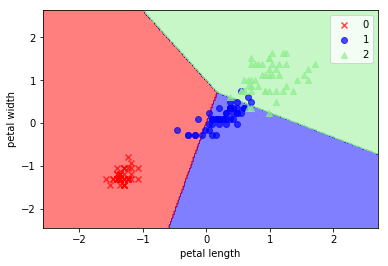

In [69]:
x_combine_std = np.vstack((x_train_std, x_test_std))
y_combine_std = np.hstack((y_train, y_test))
plot_decision_regions(x = x_combine_std, y = y_combine_std,
                     classifier = ppn,
                     )
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

그림에서 알수 있듯이 **iris** 데이터는 완벽하게 선형으로 분리 할 수 없습니다. 따라서 선형 분류 알고리즘인 퍼셉트론은 올바른 선택이 아닙니다. 

## 의사결정나무 학습

의사결정나무는 우리가 모델의 해석을 신경 써야 할 때 매력적인 알고리즘 입니다. 이름에서 알 수 있듯이, 연속적인 질문으로 의사결정을 함으로써 데이터를 쪼개어 가는 것입니다.

**의사결정나무 만들기**
의사결정나무는 피처 공간을 사각형으로 나눔으로써 복잡한 결정 경계를 생성합니다.

In [72]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = 3, random_state=0)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_train)

print("정확도는 {:0.4f} 입니다".format(accuracy_score(y_train, y_pred)))

정확도는 0.9810 입니다


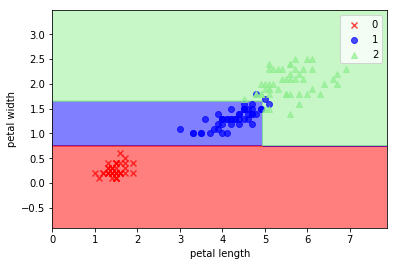

In [73]:
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x = x_combined, y = y_combined,
                     classifier = tree,
                     )
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

앞의 예제 코드를 실행하고 나면 의사결정나무의 전형적인 추-평행 결정 경계를 얻게 됩니다. 

### 랜덤 포레스트를 사용해서 강화하기

랜덤 포레스트(random forests)는 좋은 분류 성능과 확장성, 사용으 편리성 덕분에 많은 인기를 얻고 있습니다. 다음과 같이 네 단계로 요약됩니다.

1. n개의 샘플 크기의 임의의 부트스트랩(bootstrap)을 그린다.
2. 부트스트랩 샘플로부터 의사결정나무를 만든다. d개의 피처를 임의로 선택하고 노드를 나눈다 
3. 앞의 단계들을 k번 반복한다
4. 다수결의 원칙에 의해 각각의 나무에 의한 예측을 합한다.

`scikit-learn`에서 `RandomForestClassifier` 모듈로 이미 구현되어 있어 우리 스스로 만들 필요는 없습니다.


In [74]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', n_estimators=10,
                               random_state =1, n_jobs = 2)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_train)

print("정확도는 {:0.4f} 입니다".format(accuracy_score(y_train, y_pred)))

정확도는 0.9905 입니다


앞의 코드를 사용해 10개의 의사결정나무로부터 (**n_estimators**) 
하나의 랜덤포레스트를 훈련시켰고 노드를 분리하기 위해 **entropy** 기준을 사용했습니다. 
**n_job** 파라미터를 통해 듀얼코어를 사용하여 훈련하도록 하였습니다.


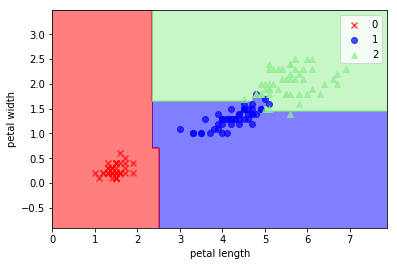

In [77]:
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x = x_combined, y = y_combined,
                     classifier = forest,
                     )
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

## KNN 알고리즘
KNN(K-nearest neighbor)은 최신의 지도 학습 알고리즘으로 이제 까지 살펴봤던 것과는 근본적으로 다릅니다. 알고리즘 그 자체는 직관적이며 다음의 단계로 요약됩니다.

1. k에 해당하는 숫자와 거리 메트릭을 선택한다.
2. 분류하고자 하는 샘플에 대한 k개의 근접한 이웃을 찾는다
3. 다수결 투표방식으로 분류한다.


In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, p =2, metric= 'minkowski')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_train)

print("정확도는 {:0.4f} 입니다".format(accuracy_score(y_train, y_pred)))

정확도는 0.9524 입니다


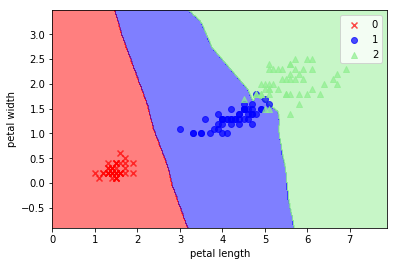

In [78]:
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x = x_combined, y = y_combined,
                     classifier = knn,
                     )
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

그림과 같이 상대적으로 부드러운 경계를 얻게 됩니다.  k를 알맞게 선택하는 것이 오버피팅이나 언더피팅 사이에서 좋은 균형을 찾는데 있어 아주 중요합니다.
또한 파마미터에 대한 자세한 내용은 찾아봐야 한다.

## 3장 결론
이번 장에서는 선형 문제나 비선형 문제를 풀기 위해 사용되는 여러가지 알고리즘에 대해 학습했어요. 퍼셉트론은 선형 문제에만 알맞고 비선형에는 적당하지 않았습니다. 랜덤 포레스트는 많은 튜닝이 필요하지 않아 실무에서 매력적인 모델이고 KNN또한 하나의 대안이 될 수 있습니다.   

적당한 알고리즘을 선택하는 것보다 더 중요한것은 좋은 데이터입니다. 다음 장에서는 머신러닝에 필요한 데이터 전처리, 피처 선택, 차원축소에 관한 주제를 다룰게요.

# 4장. 데이터 전처리

데이터의 질은 머신러닝에서 가장 중요한 요소입니다. 그렇기 때문에 알고리즘에 입력하기 전에 전처리하는 것을 알아 보겠습니다.

##  범주형(category) 데이터 다루기
실제 데이터는 하나 이상의 범주형 데이터를 포함하고 있는 것이 일반적입니다. 범주형 데이터에도 명목형과 순위형 데이터로 나눌수 있습니다. 순위형에는 옷의 크기를 예로 들수 있겠고 명목형에는 옷의 색상이라고 할 수 있습니다.

이러한 범주형 데이터를 다루기 위한 여러 가지 기법을 알아보기 전에, 문제를 설명하기 위해 새로운 데이터 프레임을 생성하겠습니다.

In [83]:
import pandas as pd
df = pd.DataFrame([
    ['red', 'M', 100000, 0],
    ['blue', 'L', 130000, 1],
    ['green', 'XL', 200000, 0],
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,red,M,100000,0
1,blue,L,130000,1
2,green,XL,200000,0


결과에서 볼 수 있듯이 명목형 피처(color), 순위형 피처(size), 숫자형 피처(price)를 포함하고 있습니다. 

### 순위형 피처 매핑
학습 알고리즘이 순위형 피처들을 정확하게 해석하도록 범주형 문자열 값을 정수로 변환해야 합니다. 

In [84]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M':1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,red,1,100000,0
1,blue,2,130000,1
2,green,3,200000,0


### 명목형 피처에 원핫 인코딩(one-hot encoding) 수행하기
앞에서는 간단한 매핑 방법을 사용해 순위형 size 피처를 정수로 변환했습니다.   

원핫 인코딩이란?
원핫 인코딩을 만들수 있는 편리한 방법은 `pandas`에 구현되어 있는 `get_dummies` 메서드를 사용하는 것입니다.

In [88]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,100000,1,0,0,1
1,130000,2,1,0,0
2,200000,3,0,1,0


## 4장 결론

데이터를 머신러닝 알고리즘에 입력하기 전에 범주형 변수를 올바르게 인코딩했는지 확인해야 하고 순위형 피처와 명목형 피처의 값을 정수 표현법으로 만드는 법을 알아보았습니다.

# 5장. 차원축소를 이용한 데이터 압축

이번 장에서는 원래보다 낮은 차원의 피처 부분공간으로 변환 시킴으로써 데이터의 정보를 요약할 수 있도록 도와주는 기법을 학습하겠습니다. 
- 비지도적 데이터 압축을 위한 주성분 분석(PCA)
- 최대화 분류 분리를 위한 선형 분리 분석(LDA)
- 커널 주성분  분석을 활용한 비선형 차원축소

## 주성분 분석(PCA)

주성분 분석(Principal component analysis)는 비지도적 선형 변환 기법 중 하나로 여러가지 영역에서 사용되고 가장 유명한 차원축소 방법입니다.

와인데이터를 가지고 예를 들어 보겠습니다.

In [89]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df_wine.iloc[:, 1:].values , df_wine.iloc[:, 0 ].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

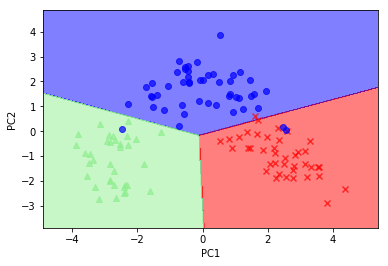

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pac = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

훈련 모델의 결정 영역이 두개의 주성분 축으로 축소된것을 볼 수 있습니다.

## 선형 판별 분석(LDA)

선형 판별 분석(Linear Discriminant Analysis)은 비정규화된 모델에서 차원의 저주 현상을 방지하고 오버피팅의 수준을 감소시키기 위한 피처 압축 기법입니다.  
LDA의 전체 개념은 PCA와 대단히 유사하지만, PCA는 데이터 내 최대 분산의 수직요소 축을 찾으려고 하는 반면, LDA는 분류의 분리를 최적화하는 부분공간을 찾는 것이 목표이다.

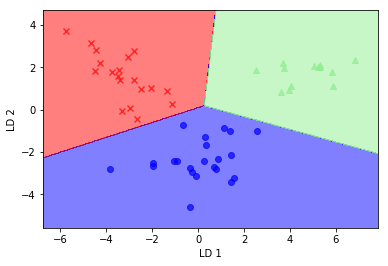

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components= 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

결론

이번 장에서는 피처 추출을 위한 차원 축소 기법을 알아보았습니다. PCA, LDA를 사용해서 수직의 피처 축을 따라 분산을 최대화하는 저차원의 부분공간으로 만들었습니다. 

# 6장. 모델평가의 사례

앞 장에서 분류를 위한 기본적인 머신러닝 알고리즘과 데이터 전처리에 대해 알아 보았습니다. 이제는 파라미터 튜닝을 통해 좋은 모델을 만들고 평가하는 사례를 알아 보겠습니다.
- 모델 성능에 관한 추정치 구하기
- 알고리즘의 일반적인 문제 진단
- 모델의 파라미터 튜닝
- 여러 성능 기준을 사용해 모델 평가하기

위스콘신 유방암 데이터로 작업하겠습니다. 이 데이터는 악성과 양성의 암세포로 구성된 569개의 데이터입니다. 데이터의 1번 열은 각 샘플의 ID, 2번열은 악성(M), 양성(B) 여부, 3번째부터 32번째 열은 30개의 실제 값으로 세포의 디지털 이미지로부터 계산된 것입니다. 이것을 이용해 암세포가 악성인지 양성인지 예측하는 모델을 만들겠습니다.


In [98]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [99]:
# 데이터를 읽어 들인 다음, 훈련용과 테스트용으로 나누겠습니다.
# Numpy 배열에 30개의 피처를 할당한다  LabelEncoder를 사용해 악양성 레이블을 정수로 변환한다

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split

X = df.loc[:, 2:].values
y  = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M','B'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 1)

최적의 성능을 위해 많은 머신러닝 알고리즘이 동일한 스케일의 입력 피처를 필요합니다. 그렇기 때문에 데이터의 열들을 표준화하고 주성분 분석(PCA)를 사용해 30개의 차원을 2차원으로 압축합니다. 

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# 훈련 데이터와 테스트 데이터를 별로도 피팅하고 변환하는대신 파이프 라인에 각각을 연결시켜 둘수 있습니다.
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state = 1))])

pipe_lr.fit(X_train, y_train)
print(' 모델의 정확도:  {:0.4f} 입니다.'.format(pipe_lr.score(X_test, y_test)))

 모델의 정확도:  0.9415 입니다.


## 교차검증을 사용해 모델 평가

머신러닝 모델이 새로운 데이터에 대한 성능을 추정하는 것이 중요합니다. 그것을 평가하기 위한 교차검증 기법
- 홀드 아웃
- k-fold

홀드아웃  
머신러닝의 일반화 성능을 추정하기 위한 전통적이면서도 인기있는 방법입니다. 처음의 데이터를 훈련데이터와 테스트 데이터로 나누고 ???
단점: 

k-fold 교차검증
훈련 데이터의 보정 없이 임의의 k 묶음으로 나누고 여기서 k-1 묶음은 모델의 훈련에 사용하고 1개는 테스트에 사용한다. k번 반복되는 과정동안 k개의 모델과 성능 추정치를 얻게 됩니다.




In [107]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator = pipe_lr,
                        X = X_train,
                        y = y_train,
                        cv = 10, # 교차검증의 라운드 수
                        n_jobs = 2) # 듀얼코어 사용
# print('교차 검증 정확도 : {}'.format(scores))
print('평균 교차 검증 정확도는 : {:0.3f} 입니다.'.format(np.mean(scores)))

평균 교차 검증 정확도는 : 0.965 입니다.


## 컨퓨전 매트릭스(confusion matrix)
간단한 사각형의 매트릭스로 네 가지 예측, 진양성, 진음성, 가양성, 가음성을 나타냅니다. `sci-kit learn`에는 편리한 `confusion_matrix` 함수를 제공합니다.

In [108]:
from sklearn.metrics import confusion_matrix
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[103   5]
 [  5  58]]


`matplotlib`의 `matshow`함수를 사용해 시각화 하겠습니다.

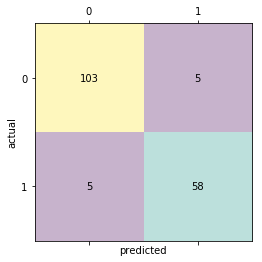

In [110]:
fig, ax = plt.subplots()
ax.matshow(confmat, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j , y = i, 
               s = confmat[i, j],
               va = 'center', ha = 'center')

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


컨퓨전 매트릭스로의 결과를 보면 이해가 좀 더 쉽습니다. 우리의 모델은 103개의 진양성 샘플과 58개의 진음성 샘플을 분류했습니다.   

